The following code was written with the help of this tutorial: https://www.youtube.com/watch?v=**IB9WfafBmjk**

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

###Generate clustering data

In [5]:
X_train, _ = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

###Visualise clustering data

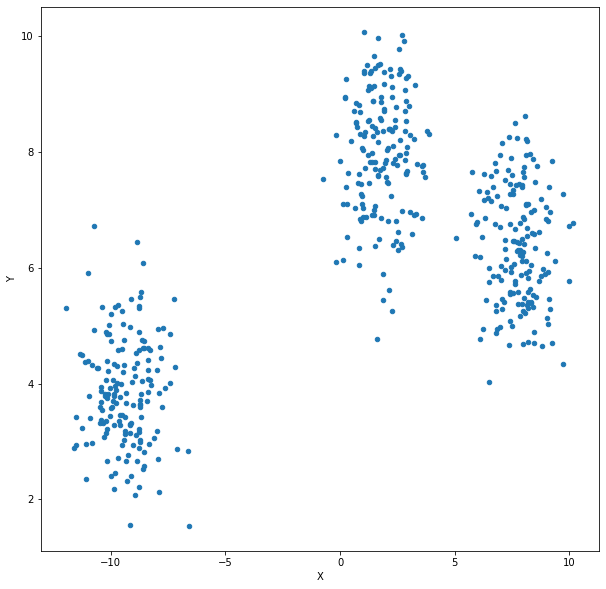

In [6]:
df = pd.DataFrame(dict(x=X_train[:,0],y=X_train[:,1]))
fig, ax = plt.subplots(figsize = (10,10))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

###Helpers to be used in K-means

In [51]:
def initialize_centers(dps, k):
  res=[]
  for i in range(k):
    x = np.random.uniform(min(dps[:,0]), max(dps[:,0]))
    y = np.random.uniform(min(dps[:,1]), max(dps[:,1]))
    res.append([x,y])
  
  res_np = np.asarray(res)
  return res_np

In [52]:
def distance(p1, p2):
  eucledian_dist = np.sqrt(sum(np.square(p1-p2)))
  return eucledian_dist

In [53]:
def assign_cluster(dps, centers, k):
  n = len(dps)
  cluster = [-1]*n
  for i in range(n):
    distances_i = []
    for j in range(k):
      distances_i.append(distance(dps[i], centers[j]))
    min_dist = np.argmin(distances_i)
    cluster[i] = min_dist

  cluster_np = np.asarray(cluster)
  return cluster_np

In [54]:
def centers_of_gravity(dps, cluster, k):
  n = len(dps)
  cgs = []

  for i in range(k):
    cluster_i = []
    for j in range(n):
      if (cluster[j]==i):
        cluster_i.append(dps[j])
    cgs.append(np.mean(cluster_i, axis=0))
  
  cgs_np = np.asarray(cgs)
  return cgs_np

In [56]:
def center_change(cgs_old, cgs_new):
  res = 0
  for x,y in zip(cgs_old, cgs_new):
    res+=distance(x,y)
  return res

In [64]:
def show_cluster(dps, cluster, cgs):
  df = pd.DataFrame(dict(x=dps[:,0],y=dps[:,1], label=cluster))
  colors = {0:'blue', 1:'orange', 2:'green'}
  fig, ax = plt.subplots(figsize = (10,10))
  grouped = df.groupby('label')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(cgs[:,0], cgs[:,1], marker='*', s=150, c='#ff2222')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.show()

###K-means

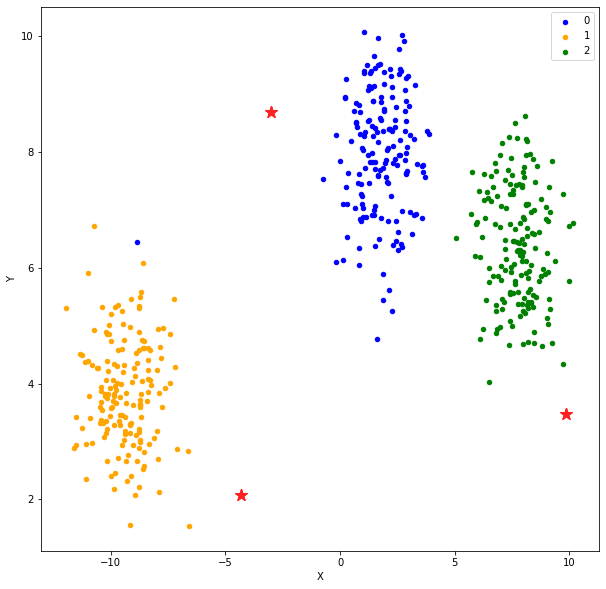

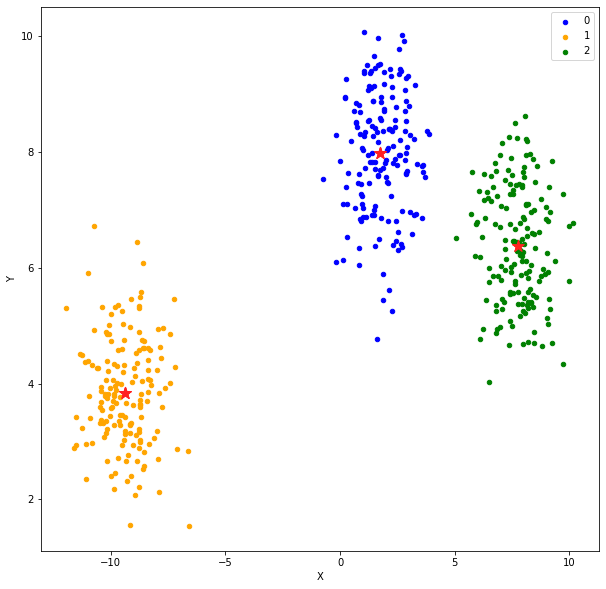

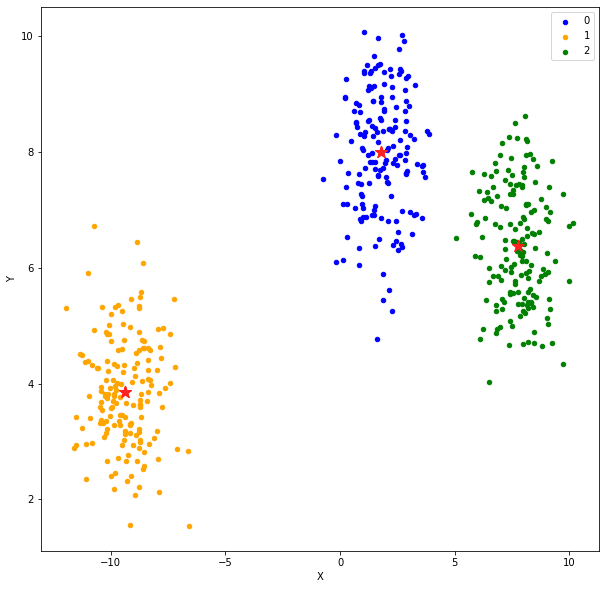

In [66]:
def k_means(k, dps):
  n = len(dps)
  cgs_old = initialize_centers(dps, k)
  cgs_new = [0]*n
  cgs_change = 100

  while(cgs_change>0.001):
    cluster = assign_cluster(dps, cgs_old, k)
    show_cluster(dps,cluster, cgs_old)
    cgs_new = centers_of_gravity(dps, cluster, k)
    cgs_change = center_change(cgs_old, cgs_new)
    cgs_old = cgs_new
  return assign_cluster

cluster = k_means(3, X_train)